In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from models import CEDN,CEDN_small,HED,HED_small
import os
import h5py
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'

In [2]:
#load models and trained weights
hed_small_model = HED_small()
hed_small_model.load_weights('Trained Models/hed_small_boa.h5')
# hed_small_model.load_weights('hed_small_human.h5')
hed_model = HED()
hed_model.load_weights('Trained Models/hed_boa.h5')
# hed_model.load_weights('hed_human.h5')
cedn_small_model = CEDN_small()
cedn_small_model.load_weights('Trained Models/cedn_small_boa.h5')
# cedn_small_model.load_weights('cedn_small_human.h5')
cedn_model = CEDN()
cedn_model.load_weights('Trained Models/cedn_boa.h5')
# cedn_model.load_weights('cedn_human.h5')

In [11]:
#load testing data
X = np.load('data/boa_testing_input.npy')
Y = np.load('data/boa_testing_output.npy')
# X = np.load('data/human_testing_input.npy')
# Y = np.load('data/human_testing_output.npy')

In [ ]:
#make predictions
hed_small_model_pred = hed_small_model.predict(X)
hed_model_pred = hed_model.predict(X)
cedn_small_model_pred = cedn_small_model.predict(X)
cedn_model_pred = cedn_model.predict(X)

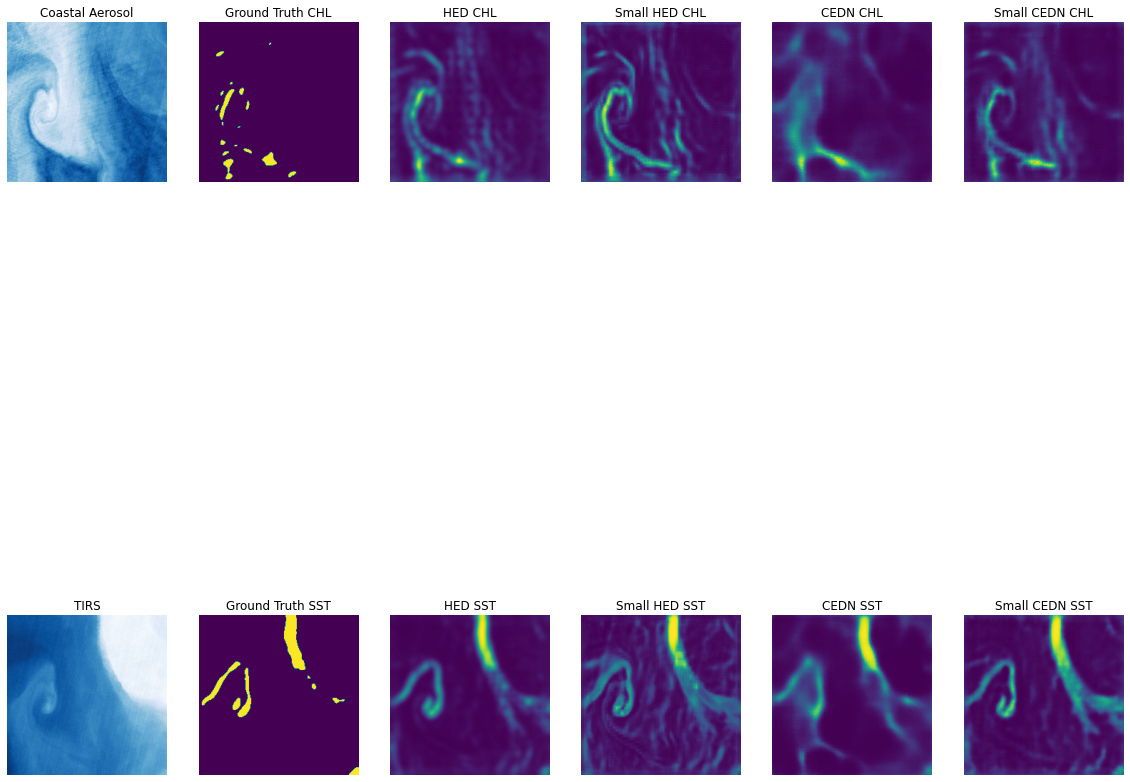

In [54]:
#plot inputs & all model outputs
from scipy.ndimage import gaussian_filter as gauss
#boa imgs in paper: good-57,66,79,189 bad-114
#human imgs in paper: good-6,29,41,45 bad-10
img = 114

fig, axs = plt.subplots(2, 6,figsize=(20,20))
axs[0, 0].imshow(X[img,:,:,0],cmap='Blues')
axs[0, 0].set_title('Coastal Aerosol')
axs[0, 1].imshow(Y[img,:,:,0])
axs[0, 1].set_title('Ground Truth CHL')
axs[0, 2].imshow(hed_model_pred[img,:,:,0])
axs[0, 2].set_title('HED CHL')
axs[0, 3].imshow(hed_small_model_pred[img,:,:,0])
axs[0, 3].set_title('Small HED CHL')
axs[0, 4].imshow(cedn_model_pred[img,:,:,0])
axs[0, 4].set_title('CEDN CHL')
axs[0, 5].imshow(cedn_small_model_pred[img,:,:,0])
axs[0, 5].set_title('Small CEDN CHL')
axs[1, 0].imshow(X[img,:,:,2],cmap='Blues')
axs[1, 0].set_title('TIRS')
axs[1, 1].imshow(Y[img,:,:,1])
axs[1, 1].set_title('Ground Truth SST')
axs[1, 2].imshow(hed_model_pred[img,:,:,1])
axs[1, 2].set_title('HED SST')
axs[1, 3].imshow(hed_small_model_pred[img,:,:,1])
axs[1, 3].set_title('Small HED SST')
axs[1, 4].imshow(cedn_model_pred[img,:,:,1])
axs[1, 4].set_title('CEDN SST')
axs[1, 5].imshow(cedn_small_model_pred[img,:,:,1])
axs[1, 5].set_title('Small CEDN SST')
for ax in axs.flat:
     ax.axis('off')